In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from matplotlib import rc
rc("font", family="serif", size=12)
rc("text", usetex=True)
rc("./weaklensing.tex")

import daft

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import json
import time
import os
import re
import tensorflow as tf
import tensorflow_probability as tfp
import pickle
import string
import scipy.stats as st
import tensorflow as tf
import sys

# Need in order to call models from models.py in directory above
sys.path.insert(1, '/Users/milesturpin/Dev/latent_variable_nn')
sys.path.insert(1, '/Users/milesturpin/Dev/latent_variable_nn/models')

tfd = tfp.distributions

InteractiveShell.ast_node_interactivity = 'all'
%config InlineBackend.figure_format = 'retina'

In [18]:
pd.set_option('precision', 4)
pd.options.display.max_colwidth = 200
#pd.options.display.column_space = 32
#pd.options.display.width = 1000

# Do this when running in terminal!
#pd.options.display.width = None

In [19]:
data_size = 'small'
x_train = np.load('../data/femnist/{data_size}/x_train.npy'.format(data_size=data_size))
y_train = np.load('../data/femnist/{data_size}/y_train.npy'.format(data_size=data_size))
gid_train = np.load('../data/femnist/{data_size}/gid_train.npy'.format(data_size=data_size))
x_test = np.load('../data/femnist/{data_size}/x_test.npy'.format(data_size=data_size))
y_test = np.load('../data/femnist/{data_size}/y_test.npy'.format(data_size=data_size))
gid_test = np.load('../data/femnist/{data_size}/gid_test.npy'.format(data_size=data_size))

## FEMNIST Samples 

In [41]:
import string
labels = string.digits + string.ascii_uppercase + string.ascii_lowercase

In [68]:
plt.rcParams.update({'font.size': 26})

In [39]:
def get_samples_from_writer(gid):
    gid_idx = np.where(gid_train == gid)[0]
    return x_train[gid_idx].reshape((-1, 28,28)), y_train[gid_idx]

['l', 'l', 'l', 'h', 'n', 'e', 'z', 'u', 't', 'i']


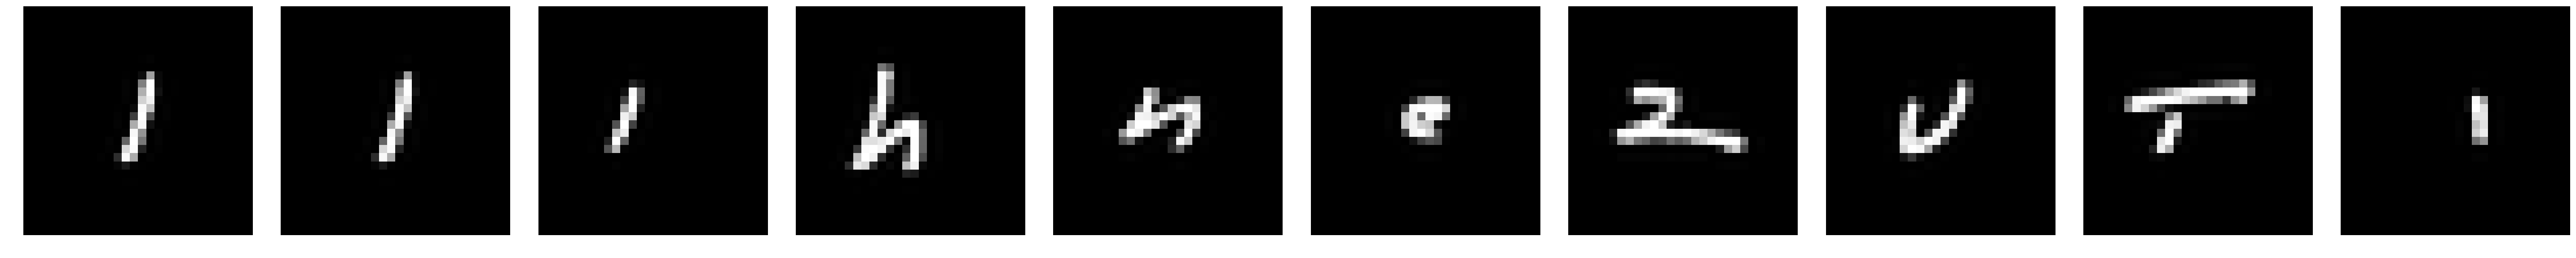

In [43]:
num_samples = 10
fig, axes = plt.subplots(1, num_samples, figsize=(num_samples*4, 4))
x_samp, y_samp = get_samples_from_writer(2)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_samp[i], cmap='Greys')
    ax.axis('off')
    ax.set_title('Label = {}'.format(labels[y_samp[i]]))
print(list(map(lambda i: labels[i], y_samp[:num_samples])))
plt.tight_layout();

['t', 't', 'F', 'O', 'A', 'F', 't', 'D', 'R', 'N']


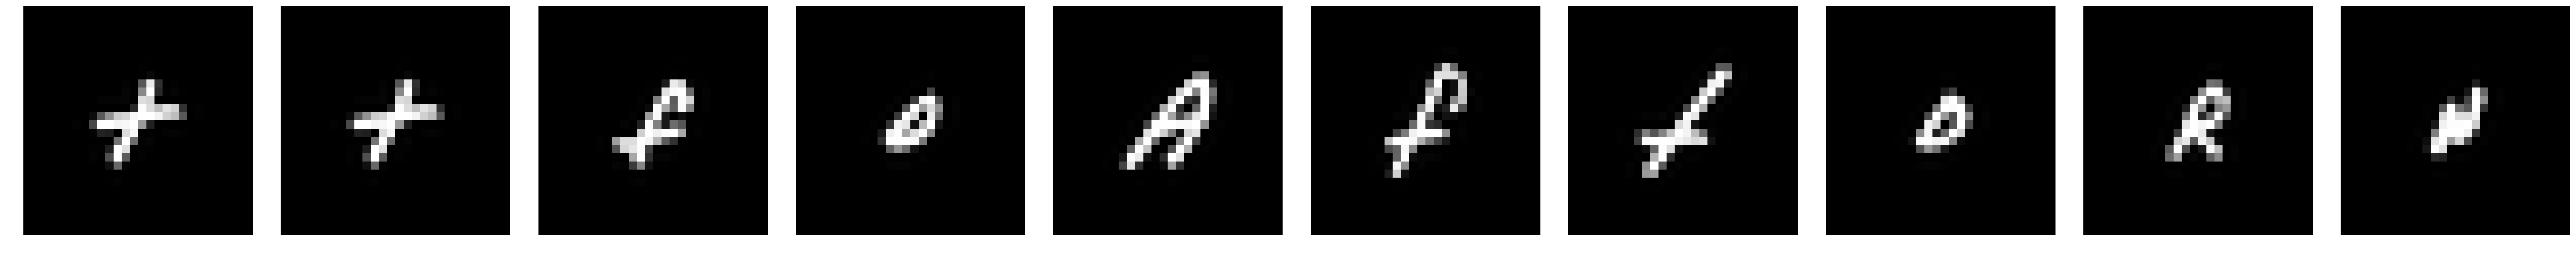

In [45]:
num_samples = 10
fig, axes = plt.subplots(1, num_samples, figsize=(num_samples*4, 4))
x_samp, y_samp = get_samples_from_writer(13)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_samp[i], cmap='Greys')
    ax.axis('off') 
    ax.set_title('Label = {}'.format(labels[y_samp[i]]))
print(list(map(lambda i: labels[i], y_samp[:num_samples])))
plt.tight_layout();

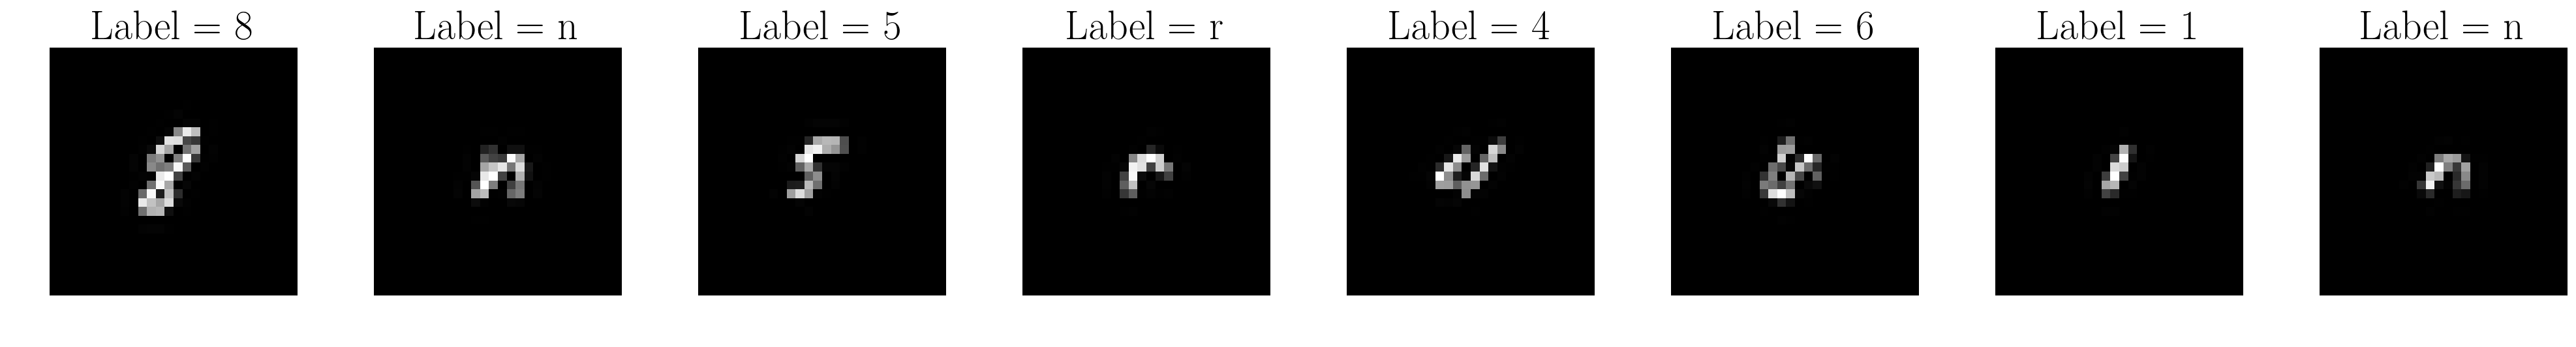

In [79]:
num_samples = 8
fig, axes = plt.subplots(1, int(num_samples), figsize=(num_samples*3.5, 4))
x_samp, y_samp = get_samples_from_writer(21)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_samp[i], cmap='Greys')
    ax.axis('off')
    ax.set_title('Label = {}'.format(labels[y_samp[i]]))
plt.savefig('../doc/figures/samples.png', bbox_inches='tight')
plt.tight_layout();

cursive = 16

## PGM

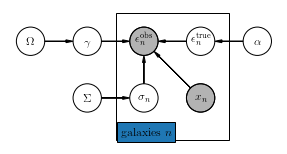

In [16]:
#plt.figure(figsize=(12,7))

pgm = daft.PGM([4.7, 2.35], origin=[-1.35, 2.2])
pgm.add_node(daft.Node("Omega", r"$\Omega$", -1, 4))
pgm.add_node(daft.Node("gamma", r"$\gamma$", 0, 4))
pgm.add_node(daft.Node("obs", r"$\epsilon^{\mathrm{obs}}_n$", 1, 4, observed=True))
pgm.add_node(daft.Node("alpha", r"$\alpha$", 3, 4))
pgm.add_node(daft.Node("true", r"$\epsilon^{\mathrm{true}}_n$", 2, 4))
pgm.add_node(daft.Node("sigma", r"$\sigma_n$", 1, 3))
pgm.add_node(daft.Node("Sigma", r"$\Sigma$", 0, 3))
pgm.add_node(daft.Node("x", r"$x_n$", 2, 3, observed=True))
pgm.add_plate(daft.Plate([0.5, 2.25, 2, 2.25],
        label=r"galaxies $n$"))
pgm.add_edge("Omega", "gamma")
pgm.add_edge("gamma", "obs")
pgm.add_edge("alpha", "true")
pgm.add_edge("true", "obs")
pgm.add_edge("x", "obs")
pgm.add_edge("Sigma", "sigma")
pgm.add_edge("sigma", "obs")
pgm.render()
pgm.figure.savefig("weaklensing.pdf")
pgm.figure.savefig("weaklensing.png", dpi=150)